# 도로별 사고심각도 다중회귀분석

## 1. 파일 불러오기

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

plt.rc('font', family='Malgun Gothic')

In [81]:
df = pd.read_csv(r'C:\Users\user\사고epdo생성0209.csv', encoding = 'cp949')
df

,RDS_MAN_NO,가해자_음주_여부,어린이보호구역_여부,자전거도로_여부,사망자수,중상자수,경상자수,부상신고자수,차대사람_길가장자리구역통행중,차대사람_보도통행중,...,비포장_건조,비포장_젖음/습기,포장_건조,포장_젖음/습기,교차로 - 사지,교차로 - 삼지,교차로 - 오지이상,교차로 - 회전,교차로아님,epdo
0,31,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,5
1,46,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,5
2,103,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,5
3,105,0,0,0,0,2,0,0,0,0,...,0,0,2,0,0,1,0,0,1,10
4,106,0,0,0,0,0,2,0,0,0,...,0,0,2,0,0,0,0,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,46082,0,0,0,0,5,2,1,0,0,...,0,0,8,0,2,4,0,0,2,32
1096,46542,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,5
1097,46602,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,3
1098,46603,0,0,0,0,1,0,1,0,0,...,0,0,2,0,1,0,0,0,1,6


(0.0, 100.0)

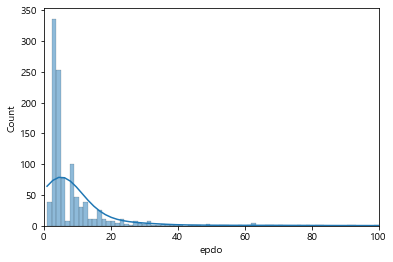

In [82]:
sns.histplot(df['epdo'], kde = True)
plt.xlim(0,100)

In [83]:
df['epdo'].describe()

count    1100.000000
mean       11.074545
std        23.521192
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       348.000000
Name: epdo, dtype: float64

In [84]:
np.quantile(df['epdo'], 0.9)

19.0

In [85]:
df = df[df['epdo']<= np.quantile(df['epdo'], 0.95)]

(1.0, 35.0)

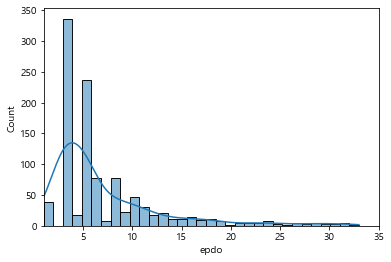

In [86]:
sns.histplot(df['epdo'], kde = True)
plt.xlim(1,35)

## 2. IQR 기준으로 outlier 제거

In [87]:
# weight = 1.5
# quantile_25 = np.quantile(df['epdo'], 0.25)
# quantile_75 = np.quantile(df['epdo'], 0.75)
# iqr = quantile_75 - quantile_25
# iqr_weight = iqr * weight
# lowest_val = quantile_25 - iqr_weight
# highest_val = quantile_75 + iqr_weight
# outlier_index = df[(df['epdo'] < lowest_val) | (df['epdo'] > highest_val)].index
# outlier_index
# df.drop(outlier_index, axis = 0, inplace = True)

In [88]:
df.columns

Index(['RDS_MAN_NO', '가해자_음주_여부', '어린이보호구역_여부', '자전거도로_여부', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '차대사람_길가장자리구역통행중', '차대사람_보도통행중', '차대사람_횡단중',
       '차대차_정면충돌', '차대차_추돌', '차대차_측면충돌', '차대차_후진중충돌', '차도통행중', '차량단독_공작물충돌',
       '차량단독_도로이탈', '차량단독_전도', '차량단독_전도전복', '피해자_연령_10대', '피해자_연령_10대미만',
       '피해자_연령_20대', '피해자_연령_30대', '피해자_연령_40대', '피해자_연령_50대', '피해자_연령_60대',
       '피해자_연령_70대', '피해자_연령_80대', '피해자_연령_90대', '빈도 수', '가해자_안전모_미착용',
       '가해자_안전모_착용', '가해자_안전모_착용불명', '가해자_안전벨트/카시트_미착용', '가해자_안전벨트/카시트_착용',
       '피해자_보호장구_보행자', '피해자_보호장구_없음', '피해자_안전모_미착용', '피해자_안전모_착용',
       '피해자_안전모_착용불명', '피해자_안전벨트/카시트_미착용', '피해자_안전벨트/카시트_착용',
       '피해자_안전벨트/카시트_착용불명', '법가_과속', '법가_교차로 통행방법 위반', '법가_기타',
       '법가_보행자 보호의무 위반', '법가_신호위반', '법가_안전거리 미확보', '법가_안전운전 의무 불이행',
       '법가_중앙선 침범', '가해자_행동_U턴중', '가해자_행동_앞지르기중', '가해자_행동_우회전중',
       '가해자_행동_좌우회전중', '가해자_행동_좌회전중', '가해자_행동_주정차중', '가해자_행동_주행중대기',
       '가해자_행동_직진중', '가해자_행동_진로변경중', '가해자_행동_출발중', '가해자_행동_후진중', '도형_교차로_교차로내',
  

In [89]:
drop_col = ['피해자_연령_10대', '피해자_연령_10대미만','피해자_연령_20대', '피해자_연령_30대', 
            '피해자_연령_40대', '피해자_연령_50대', '피해자_연령_60대','피해자_연령_70대', 
            '피해자_연령_80대', '피해자_연령_90대','빈도 수', '사망자수', '중상자수','경상자수', '부상신고자수']

In [90]:
df.drop(drop_col, axis = 1, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 3. 상관분석

In [91]:
df_corr = df.corr(method = 'pearson')
df_corr_col = df_corr[df_corr['epdo'] >= 0.3].index

In [92]:
df.corr(method = 'pearson')

,RDS_MAN_NO,가해자_음주_여부,어린이보호구역_여부,자전거도로_여부,차대사람_길가장자리구역통행중,차대사람_보도통행중,차대사람_횡단중,차대차_정면충돌,차대차_추돌,차대차_측면충돌,...,비포장_건조,비포장_젖음/습기,포장_건조,포장_젖음/습기,교차로 - 사지,교차로 - 삼지,교차로 - 오지이상,교차로 - 회전,교차로아님,epdo
RDS_MAN_NO,1.000000,-0.084364,0.029626,0.044316,-0.076907,0.035025,0.033165,0.002264,-0.035882,0.055855,...,0.020253,0.010792,-0.021965,-0.026707,0.003449,-0.051816,0.023766,0.006347,-0.013185,-0.075281
가해자_음주_여부,-0.084364,1.000000,-0.024407,0.054912,-0.005035,-0.015992,-0.020288,-0.005213,0.004160,0.041441,...,-0.005035,-0.005035,0.101354,0.079053,0.020298,0.063511,0.016007,-0.010785,0.128676,0.100102
어린이보호구역_여부,0.029626,-0.024407,1.000000,-0.013164,-0.004638,-0.014731,0.034431,0.066644,-0.027484,0.080404,...,-0.004638,-0.004638,0.094417,0.025079,0.092119,0.008421,-0.021545,-0.009934,0.051235,0.054903
자전거도로_여부,0.044316,0.054912,-0.013164,1.000000,-0.002716,0.329696,-0.010942,0.044712,-0.016091,0.042049,...,-0.002716,-0.002716,0.107065,0.013028,0.076604,-0.034243,-0.012615,-0.005816,0.131034,0.121438
차대사람_길가장자리구역통행중,-0.076907,-0.005035,-0.004638,-0.002716,1.000000,-0.003039,-0.003856,-0.011927,-0.005670,-0.025925,...,-0.000957,-0.000957,0.006743,-0.008822,0.004946,-0.017636,-0.004445,-0.002050,0.019758,0.005120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
교차로 - 삼지,-0.051816,0.063511,0.008421,-0.034243,-0.017636,-0.056012,0.007487,0.112090,0.035278,0.262184,...,-0.017636,-0.017636,0.415165,0.057139,-0.080268,1.000000,-0.018927,-0.037772,-0.019674,0.369737
교차로 - 오지이상,0.023766,0.016007,-0.021545,-0.012615,-0.004445,-0.014117,-0.017909,-0.040491,0.008892,0.063887,...,-0.004445,-0.004445,0.044973,0.002362,-0.072012,-0.018927,1.000000,-0.009520,-0.002113,0.016310
교차로 - 회전,0.006347,-0.010785,-0.009934,-0.005816,-0.002050,-0.006509,-0.008258,0.033743,-0.012144,-0.003170,...,-0.002050,-0.002050,0.038572,-0.018896,-0.052365,-0.037772,-0.009520,1.000000,0.019687,0.036445
교차로아님,-0.013185,0.128676,0.051235,0.131034,0.019758,0.129864,0.090247,0.158976,0.198088,0.309581,...,0.062021,0.019758,0.479205,0.055296,-0.042546,-0.019674,-0.002113,0.019687,1.000000,0.426029


<AxesSubplot:>

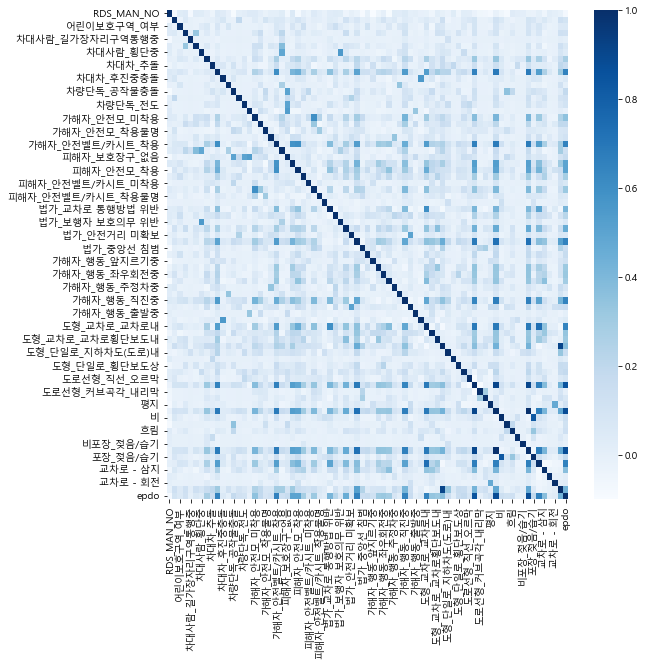

In [93]:
plt.figure(figsize = (9,9))
sns.heatmap(df.corr(method = 'pearson'),  cmap='Blues')

In [94]:
df_corr_col

Index(['차대차_측면충돌', '가해자_안전모_미착용', '가해자_안전벨트/카시트_착용', '피해자_안전모_미착용',
       '피해자_안전모_착용', '피해자_안전벨트/카시트_착용', '법가_교차로 통행방법 위반', '법가_신호위반',
       '법가_안전운전 의무 불이행', '가해자_행동_우회전중', '가해자_행동_좌우회전중', '가해자_행동_직진중',
       '도형_교차로_교차로내', '도형_교차로_교차로부근', '도형_교차로_교차로횡단보도내', '도형_단일로_기타단일로',
       '도로선형_직선_평지', '맑음', '포장_건조', '교차로 - 사지', '교차로 - 삼지', '교차로아님', 'epdo'],
      dtype='object')

In [95]:
df_corr['epdo'][df_corr['epdo'] >= 0.3] # 13개 / '빈도 수','epdo' 제외

차대차_측면충돌           0.655029
가해자_안전모_미착용        0.353385
가해자_안전벨트/카시트_착용    0.653991
피해자_안전모_미착용        0.497464
피해자_안전모_착용         0.500687
피해자_안전벨트/카시트_착용    0.321009
법가_교차로 통행방법 위반     0.412464
법가_신호위반            0.455320
법가_안전운전 의무 불이행     0.654148
가해자_행동_우회전중        0.316551
가해자_행동_좌우회전중       0.324260
가해자_행동_직진중         0.649960
도형_교차로_교차로내        0.647390
도형_교차로_교차로부근       0.336346
도형_교차로_교차로횡단보도내    0.319406
도형_단일로_기타단일로       0.371601
도로선형_직선_평지         0.849167
맑음                 0.881364
포장_건조              0.878491
교차로 - 사지           0.653145
교차로 - 삼지           0.369737
교차로아님              0.426029
epdo               1.000000
Name: epdo, dtype: float64

In [96]:
df_var_selected = df[df_corr_col]

In [97]:
df_var_selected

,차대차_측면충돌,가해자_안전모_미착용,가해자_안전벨트/카시트_착용,피해자_안전모_미착용,피해자_안전모_착용,피해자_안전벨트/카시트_착용,법가_교차로 통행방법 위반,법가_신호위반,법가_안전운전 의무 불이행,가해자_행동_우회전중,...,도형_교차로_교차로부근,도형_교차로_교차로횡단보도내,도형_단일로_기타단일로,도로선형_직선_평지,맑음,포장_건조,교차로 - 사지,교차로 - 삼지,교차로아님,epdo
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,5
1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,1,1,0,1,0,5
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,5
3,1,0,2,0,2,0,1,0,1,0,...,0,0,1,2,2,2,0,1,1,10
4,0,1,1,1,0,0,0,0,2,0,...,0,0,1,2,2,2,0,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2,4,2,2,2,3,1,4,0,...,0,0,1,8,8,8,2,4,2,32
1096,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,1,1,0,0,1,5
1097,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,1,0,0,1,3
1098,0,0,1,0,1,0,0,0,2,0,...,1,0,1,2,2,2,1,0,1,6


In [98]:
df_var_selected = df_var_selected.drop(['빈도 수'], axis = 1)

KeyError: "['빈도 수'] not found in axis"

In [99]:
df_var_selected

,차대차_측면충돌,가해자_안전모_미착용,가해자_안전벨트/카시트_착용,피해자_안전모_미착용,피해자_안전모_착용,피해자_안전벨트/카시트_착용,법가_교차로 통행방법 위반,법가_신호위반,법가_안전운전 의무 불이행,가해자_행동_우회전중,...,도형_교차로_교차로부근,도형_교차로_교차로횡단보도내,도형_단일로_기타단일로,도로선형_직선_평지,맑음,포장_건조,교차로 - 사지,교차로 - 삼지,교차로아님,epdo
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,5
1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,1,1,0,1,0,5
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,5
3,1,0,2,0,2,0,1,0,1,0,...,0,0,1,2,2,2,0,1,1,10
4,0,1,1,1,0,0,0,0,2,0,...,0,0,1,2,2,2,0,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2,4,2,2,2,3,1,4,0,...,0,0,1,8,8,8,2,4,2,32
1096,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,1,1,0,0,1,5
1097,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,1,0,0,1,3
1098,0,0,1,0,1,0,0,0,2,0,...,1,0,1,2,2,2,1,0,1,6


In [100]:
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family="Malgun Gothic")

In [101]:
x_data = df_var_selected.drop(['epdo'], axis = 1)

In [102]:
target = df_var_selected[['epdo']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x_data, target, train_size = 0.7, test_size = 0.3)
X_train = sm.add_constant(X_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 23) (314, 22) (732, 1) (314, 1)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [104]:
# 회귀모델 적합
multi_model = sm.OLS(y_train, X_train)
fitted_multi_model = multi_model.fit()

# 결과 출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   epdo   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     168.4
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          5.56e-264
Time:                        14:55:32   Log-Likelihood:                -1692.3
No. Observations:                 732   AIC:                             3431.
Df Residuals:                     709   BIC:                             3536.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2673      0.155      1.725      0.085      -0.037       0.572
차대차_측면충돌            0.1720      0.144      1.194      0.233      -0.111       0.455
가해자_안전모_미착용        -0.1344      0.245     -0.548      0.584      -0.616       0.347
가해자_안전벨트/카시트_착용     0.1052      0.179      0.586      0.558      -0.247       0.458
피해자_안전모_미착용        -0.2068      0.210     -0.986      0.325      -0.619       0.205
피해자_안전모_착용         -0.1726      0.213     -0.810      0.418      -0.591       0.246
피해자_안전벨트/카시트_착용    -0.7670      0.265     -2.896      0.004      -1.287      -0.247
법가_교차로 통행방법 위반      0.4424      0.254      1.745      0.081      -0.055       0.940
법가_신호위반             0.6746      0.299      2.254      0.025       0.087       1.262
법가_안전운전 의무 불이행      0.0562      0.209      0.268      0.789      -0.355       0.467
가해자_행동_우회전중        -0.1831      0.245     -0.748      0.455      -0.663       0.297
가해자_행동_좌우회전중        0.3335      0.260      1.281      0.201      -0.178       0.845
가해자_행동_직진중          0.3148      0.163      1.936      0.053      -0.004       0.634
도형_교차로_교차로내         3.8120      0.670      5.693      0.000       2.497       5.127
도형_교차로_교차로부근        4.4644      0.666      6.704      0.000       3.157       5.772
도형_교차로_교차로횡단보도내     3.8303      0.704      5.443      0.000       2.449       5.212
도형_단일로_기타단일로        0.0541      0.352      0.154      0.878      -0.637       0.745
도로선형_직선_평지         -0.1956      0.197     -0.994      0.321      -0.582       0.191
맑음                  0.0503      0.557      0.090      0.928      -1.043       1.144
포장_건조              -1.0127      0.563     -1.799      0.072      -2.118       0.093
교차로 - 사지            0.8022      0.520      1.544      0.123      -0.218       1.823
교차로 - 삼지            0.4205      0.523      0.805      0.421      -0.605       1.446
교차로아님               4.4225      0.525      8.430      0.000       3.392       5.453
==============================================================================
Omnibus:                      297.375   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2325.210
Skew:                           1.626   Prob(JB):                         0.00
Kurtosis:                      11.103   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]

vif['features'] = x_data.columns
vif

,VIF Factor,features
0,3.850728,차대차_측면충돌
1,2.326314,가해자_안전모_미착용
2,6.223990,가해자_안전벨트/카시트_착용
3,4.140404,피해자_안전모_미착용
4,3.715793,피해자_안전모_착용
5,2.266506,피해자_안전벨트/카시트_착용
6,4.505843,법가_교차로 통행방법 위반
7,2.531311,법가_신호위반
8,10.739499,법가_안전운전 의무 불이행
9,2.090181,가해자_행동_우회전중


* '맑음' 컬럼 제거한 데이터로 다시 회귀분석

In [106]:
x_data2 = x_data.drop(['맑음'], axis = 1)

In [107]:
target = df_var_selected[['epdo']]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x_data2, target, train_size = 0.7, test_size = 0.3)
X_train = sm.add_constant(X_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 22) (314, 21) (732, 1) (314, 1)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [109]:
# 회귀모델 적합
multi_model2 = sm.OLS(y_train, X_train)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   epdo   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.10e-272
Time:                        14:55:33   Log-Likelihood:                -1670.6
No. Observations:                 732   AIC:                             3385.
Df Residuals:                     710   BIC:                             3486.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1767      0.150      1.179      0.239      -0.118       0.471
차대차_측면충돌            0.0334      0.140      0.239      0.811      -0.241       0.308
가해자_안전모_미착용        -0.5607      0.245     -2.289      0.022      -1.042      -0.080
가해자_안전벨트/카시트_착용    -0.0762      0.177     -0.431      0.667      -0.424       0.271
피해자_안전모_미착용        -0.0324      0.199     -0.163      0.871      -0.423       0.358
피해자_안전모_착용         -0.0397      0.210     -0.189      0.850      -0.452       0.373
피해자_안전벨트/카시트_착용    -0.4807      0.259     -1.859      0.063      -0.988       0.027
법가_교차로 통행방법 위반      0.2278      0.246      0.925      0.355      -0.256       0.711
법가_신호위반             0.5177      0.292      1.775      0.076      -0.055       1.090
법가_안전운전 의무 불이행     -0.0339      0.203     -0.167      0.868      -0.433       0.365
가해자_행동_우회전중         0.1964      0.241      0.814      0.416      -0.277       0.670
가해자_행동_좌우회전중        0.5114      0.257      1.992      0.047       0.007       1.015
가해자_행동_직진중          0.3304      0.158      2.085      0.037       0.019       0.641
도형_교차로_교차로내         3.8919      0.658      5.910      0.000       2.599       5.185
도형_교차로_교차로부근        4.6329      0.649      7.138      0.000       3.359       5.907
도형_교차로_교차로횡단보도내     3.5184      0.702      5.011      0.000       2.140       4.897
도형_단일로_기타단일로       -0.1585      0.338     -0.469      0.639      -0.822       0.505
도로선형_직선_평지         -0.0634      0.180     -0.353      0.724      -0.416       0.289
포장_건조              -1.4268      0.315     -4.532      0.000      -2.045      -0.809
교차로 - 사지            1.2162      0.503      2.419      0.016       0.229       2.203
교차로 - 삼지            0.9117      0.516      1.767      0.078      -0.101       1.925
교차로아님               5.2838      0.515     10.261      0.000       4.273       6.295
==============================================================================
Omnibus:                      246.931   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1757.312
Skew:                           1.327   Prob(JB):                         0.00
Kurtosis:                      10.111   Cond. No.                         67.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]

vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,3.833216,차대차_측면충돌
1,2.323382,가해자_안전모_미착용
2,6.221655,가해자_안전벨트/카시트_착용
3,4.121149,피해자_안전모_미착용
4,3.715228,피해자_안전모_착용
5,2.265636,피해자_안전벨트/카시트_착용
6,4.464981,법가_교차로 통행방법 위반
7,2.529995,법가_신호위반
8,10.722380,법가_안전운전 의무 불이행
9,2.052626,가해자_행동_우회전중


* 도형_교차로_교차로 내 제거하고 회귀분석

In [111]:
x_data3 = x_data2.drop(['포장_건조'], axis = 1)

In [112]:
target = df_var_selected[['epdo']]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x_data3, target, train_size = 0.7, test_size = 0.3)
X_train = sm.add_constant(X_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 21) (314, 20) (732, 1) (314, 1)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [114]:
# 회귀모델 적합
multi_model3 = sm.OLS(y_train, X_train)
fitted_multi_model3 = multi_model3.fit()

# 결과 출력
fitted_multi_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   epdo   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     217.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          3.99e-287
Time:                        14:55:34   Log-Likelihood:                -1625.1
No. Observations:                 732   AIC:                             3292.
Df Residuals:                     711   BIC:                             3389.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1398      0.142      0.984      0.325      -0.139       0.419
차대차_측면충돌            0.1405      0.130      1.078      0.281      -0.115       0.396
가해자_안전모_미착용         0.0279      0.232      0.120      0.904      -0.428       0.484
가해자_안전벨트/카시트_착용    -0.1396      0.168     -0.829      0.407      -0.470       0.191
피해자_안전모_미착용         0.0033      0.187      0.018      0.986      -0.365       0.371
피해자_안전모_착용          0.3290      0.201      1.639      0.102      -0.065       0.723
피해자_안전벨트/카시트_착용    -0.8661      0.253     -3.417      0.001      -1.364      -0.368
법가_교차로 통행방법 위반      0.6741      0.230      2.927      0.004       0.222       1.126
법가_신호위반             0.6895      0.276      2.495      0.013       0.147       1.232
법가_안전운전 의무 불이행      0.0837      0.194      0.430      0.667      -0.298       0.465
가해자_행동_우회전중         0.0858      0.232      0.370      0.711      -0.369       0.541
가해자_행동_좌우회전중        0.5845      0.257      2.272      0.023       0.079       1.090
가해자_행동_직진중          0.4605      0.149      3.084      0.002       0.167       0.754
도형_교차로_교차로내         2.9217      0.472      6.194      0.000       1.996       3.848
도형_교차로_교차로부근        3.4574      0.481      7.191      0.000       2.513       4.401
도형_교차로_교차로횡단보도내     2.6363      0.537      4.913      0.000       1.583       3.690
도형_단일로_기타단일로        0.1800      0.307      0.587      0.557      -0.422       0.782
도로선형_직선_평지         -0.1988      0.185     -1.075      0.283      -0.562       0.164
교차로 - 사지            0.6125      0.408      1.503      0.133      -0.188       1.413
교차로 - 삼지            0.3795      0.419      0.905      0.366      -0.444       1.203
교차로아님               3.2840      0.395      8.312      0.000       2.508       4.060
==============================================================================
Omnibus:                      230.990   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1616.219
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                       9.851   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]

vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,3.832145,차대차_측면충돌
1,2.323241,가해자_안전모_미착용
2,6.216681,가해자_안전벨트/카시트_착용
3,4.120631,피해자_안전모_미착용
4,3.703254,피해자_안전모_착용
5,2.255009,피해자_안전벨트/카시트_착용
6,4.450811,법가_교차로 통행방법 위반
7,2.528379,법가_신호위반
8,10.718554,법가_안전운전 의무 불이행
9,2.052575,가해자_행동_우회전중


In [116]:
x_data4 = x_data3.drop(['도형_교차로_교차로내'], axis = 1)

In [117]:
target = df_var_selected[['epdo']]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x_data4, target, train_size = 0.7, test_size = 0.3)
X_train = sm.add_constant(X_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 20) (314, 19) (732, 1) (314, 1)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [119]:
# 회귀모델 적합
multi_model4 = sm.OLS(y_train, X_train)
fitted_multi_model4 = multi_model4.fit()

# 결과 출력
fitted_multi_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   epdo   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          1.07e-249
Time:                        14:55:35   Log-Likelihood:                -1681.0
No. Observations:                 732   AIC:                             3402.
Df Residuals:                     712   BIC:                             3494.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2867      0.153      1.871      0.062      -0.014       0.588
차대차_측면충돌            0.2387      0.142      1.686      0.092      -0.039       0.517
가해자_안전모_미착용        -0.0695      0.240     -0.290      0.772      -0.540       0.401
가해자_안전벨트/카시트_착용    -0.1278      0.178     -0.719      0.472      -0.477       0.221
피해자_안전모_미착용         0.0791      0.207      0.381      0.703      -0.328       0.486
피해자_안전모_착용          0.2751      0.209      1.314      0.189      -0.136       0.686
피해자_안전벨트/카시트_착용    -0.3544      0.258     -1.376      0.169      -0.860       0.151
법가_교차로 통행방법 위반      0.8913      0.250      3.560      0.000       0.400       1.383
법가_신호위반             1.3823      0.279      4.950      0.000       0.834       1.931
법가_안전운전 의무 불이행      0.6429      0.196      3.277      0.001       0.258       1.028
가해자_행동_우회전중         0.2238      0.251      0.891      0.373      -0.269       0.717
가해자_행동_좌우회전중        0.7778      0.280      2.777      0.006       0.228       1.328
가해자_행동_직진중          0.4606      0.163      2.828      0.005       0.141       0.780
도형_교차로_교차로부근        0.6378      0.207      3.078      0.002       0.231       1.045
도형_교차로_교차로횡단보도내     0.1432      0.296      0.483      0.629      -0.438       0.725
도형_단일로_기타단일로       -0.0349      0.344     -0.101      0.919      -0.710       0.640
도로선형_직선_평지          0.2237      0.184      1.215      0.225      -0.138       0.585
교차로 - 사지            2.4945      0.258      9.660      0.000       1.987       3.001
교차로 - 삼지            2.3003      0.269      8.545      0.000       1.772       2.829
교차로아님               2.4804      0.402      6.177      0.000       1.692       3.269
==============================================================================
Omnibus:                      298.258   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2515.045
Skew:                           1.606   Prob(JB):                         0.00
Kurtosis:                      11.494   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]

vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,3.779826,차대차_측면충돌
1,2.321753,가해자_안전모_미착용
2,6.211054,가해자_안전벨트/카시트_착용
3,4.070972,피해자_안전모_미착용
4,3.593964,피해자_안전모_착용
5,2.249337,피해자_안전벨트/카시트_착용
6,4.154090,법가_교차로 통행방법 위반
7,2.379712,법가_신호위반
8,9.870217,법가_안전운전 의무 불이행
9,2.052497,가해자_행동_우회전중


In [121]:
x_data5 = x_data4.drop(['도로선형_직선_평지'], axis = 1)

In [122]:
target = df_var_selected[['epdo']]

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]

vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,3.778731,차대차_측면충돌
1,2.320381,가해자_안전모_미착용
2,6.196800,가해자_안전벨트/카시트_착용
3,4.025953,피해자_안전모_미착용
4,3.580728,피해자_안전모_착용
5,2.235220,피해자_안전벨트/카시트_착용
6,4.146720,법가_교차로 통행방법 위반
7,2.372231,법가_신호위반
8,9.770543,법가_안전운전 의무 불이행
9,2.048253,가해자_행동_우회전중


In [124]:
X_train, X_test, y_train, y_test = train_test_split(x_data5, target, train_size = 0.7, test_size = 0.3)
X_train = sm.add_constant(X_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 19) (314, 18) (732, 1) (314, 1)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [125]:
# 회귀모델 적합
multi_model5 = sm.OLS(y_train, X_train)
fitted_multi_model5 = multi_model5.fit()

# 결과 출력
fitted_multi_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   epdo   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          3.80e-264
Time:                        14:55:36   Log-Likelihood:                -1645.0
No. Observations:                 732   AIC:                             3328.
Df Residuals:                     713   BIC:                             3415.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3259      0.146      2.231      0.026       0.039       0.613
차대차_측면충돌            0.1723      0.133      1.293      0.196      -0.089       0.434
가해자_안전모_미착용         0.1302      0.243      0.536      0.592      -0.347       0.608
가해자_안전벨트/카시트_착용    -0.0977      0.168     -0.580      0.562      -0.428       0.233
피해자_안전모_미착용         0.2815      0.190      1.482      0.139      -0.091       0.654
피해자_안전모_착용          0.2311      0.199      1.160      0.246      -0.160       0.622
피해자_안전벨트/카시트_착용    -0.6290      0.250     -2.515      0.012      -1.120      -0.138
법가_교차로 통행방법 위반      0.9651      0.230      4.191      0.000       0.513       1.417
법가_신호위반             1.4475      0.268      5.405      0.000       0.922       1.973
법가_안전운전 의무 불이행      0.5058      0.188      2.685      0.007       0.136       0.876
가해자_행동_우회전중        -0.2049      0.245     -0.838      0.402      -0.685       0.275
가해자_행동_좌우회전중        0.3626      0.254      1.429      0.153      -0.136       0.861
가해자_행동_직진중          0.4008      0.160      2.506      0.012       0.087       0.715
도형_교차로_교차로부근        0.4660      0.192      2.432      0.015       0.090       0.842
도형_교차로_교차로횡단보도내    -0.1070      0.292     -0.367      0.714      -0.680       0.465
도형_단일로_기타단일로        0.1009      0.330      0.306      0.760      -0.546       0.748
교차로 - 사지            2.8149      0.217     12.974      0.000       2.389       3.241
교차로 - 삼지            2.7465      0.222     12.360      0.000       2.310       3.183
교차로아님               2.5887      0.372      6.967      0.000       1.859       3.318
==============================================================================
Omnibus:                      263.255   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2336.759
Skew:                           1.359   Prob(JB):                         0.00
Kurtosis:                      11.320   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
x_data6 = x_data5.drop(['교차로아님'], axis = 1)

In [127]:
target = df_var_selected[['epdo']]

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data6.values, i) for i in range(x_data6.shape[1])]

vif['features'] = x_data6.columns
vif

,VIF Factor,features
0,3.604983,차대차_측면충돌
1,2.277604,가해자_안전모_미착용
2,6.161500,가해자_안전벨트/카시트_착용
3,3.939679,피해자_안전모_미착용
4,3.458103,피해자_안전모_착용
5,2.231474,피해자_안전벨트/카시트_착용
6,4.027086,법가_교차로 통행방법 위반
7,2.278446,법가_신호위반
8,8.393470,법가_안전운전 의무 불이행
9,1.989445,가해자_행동_우회전중


In [129]:
x_data6

,차대차_측면충돌,가해자_안전모_미착용,가해자_안전벨트/카시트_착용,피해자_안전모_미착용,피해자_안전모_착용,피해자_안전벨트/카시트_착용,법가_교차로 통행방법 위반,법가_신호위반,법가_안전운전 의무 불이행,가해자_행동_우회전중,가해자_행동_좌우회전중,가해자_행동_직진중,도형_교차로_교차로부근,도형_교차로_교차로횡단보도내,도형_단일로_기타단일로,교차로 - 사지,교차로 - 삼지
0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,2,0,2,0,1,0,1,0,0,2,0,0,1,0,1
4,0,1,1,1,0,0,0,0,2,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2,4,2,2,2,3,1,4,0,1,3,0,0,1,2,4
1096,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1097,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1098,0,0,1,0,1,0,0,0,2,0,0,2,1,0,1,1,0


In [130]:
x_data6.to_csv('회귀분석_최종.csv', encoding = 'cp949')

In [131]:
x_data6

,차대차_측면충돌,가해자_안전모_미착용,가해자_안전벨트/카시트_착용,피해자_안전모_미착용,피해자_안전모_착용,피해자_안전벨트/카시트_착용,법가_교차로 통행방법 위반,법가_신호위반,법가_안전운전 의무 불이행,가해자_행동_우회전중,가해자_행동_좌우회전중,가해자_행동_직진중,도형_교차로_교차로부근,도형_교차로_교차로횡단보도내,도형_단일로_기타단일로,교차로 - 사지,교차로 - 삼지
0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,2,0,2,0,1,0,1,0,0,2,0,0,1,0,1
4,0,1,1,1,0,0,0,0,2,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2,4,2,2,2,3,1,4,0,1,3,0,0,1,2,4
1096,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1097,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1098,0,0,1,0,1,0,0,0,2,0,0,2,1,0,1,1,0


In [132]:
X_train, X_test, y_train, y_test = train_test_split(x_data6, target, train_size = 0.7, test_size = 0.3)
X_train = sm.add_constant(X_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 18) (314, 17) (732, 1) (314, 1)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [133]:
# 회귀모델 적합
multi_model6 = sm.OLS(y_train, X_train)
fitted_multi_model6 = multi_model6.fit()

# 결과 출력
fitted_multi_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   epdo   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          1.88e-255
Time:                        14:55:38   Log-Likelihood:                -1708.9
No. Observations:                 732   AIC:                             3454.
Df Residuals:                     714   BIC:                             3536.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5826      0.155      3.767      0.000       0.279       0.886
차대차_측면충돌            0.4348      0.144      3.018      0.003       0.152       0.718
가해자_안전모_미착용         0.3269      0.252      1.295      0.196      -0.169       0.822
가해자_안전벨트/카시트_착용    -0.1892      0.185     -1.020      0.308      -0.553       0.175
피해자_안전모_미착용         0.4734      0.203      2.328      0.020       0.074       0.873
피해자_안전모_착용          0.3576      0.220      1.623      0.105      -0.075       0.790
피해자_안전벨트/카시트_착용    -0.4716      0.267     -1.765      0.078      -0.996       0.053
법가_교차로 통행방법 위반      0.9241      0.246      3.762      0.000       0.442       1.406
법가_신호위반             1.4941      0.286      5.228      0.000       0.933       2.055
법가_안전운전 의무 불이행      0.7785      0.187      4.159      0.000       0.411       1.146
가해자_행동_우회전중         0.3732      0.251      1.485      0.138      -0.120       0.866
가해자_행동_좌우회전중        0.6221      0.259      2.404      0.016       0.114       1.130
가해자_행동_직진중          0.6761      0.159      4.247      0.000       0.364       0.989
도형_교차로_교차로부근        0.5742      0.205      2.806      0.005       0.172       0.976
도형_교차로_교차로횡단보도내    -0.3150      0.305     -1.031      0.303      -0.915       0.285
도형_단일로_기타단일로        2.0540      0.210      9.794      0.000       1.642       2.466
교차로 - 사지            2.2285      0.201     11.109      0.000       1.835       2.622
교차로 - 삼지            2.0022      0.213      9.387      0.000       1.583       2.421
==============================================================================
Omnibus:                      245.554   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1436.729
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                       9.280   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
x_data7 = x_data6.drop(['가해자_안전모_미착용'], axis = 1)
target = df_var_selected[['epdo']]

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data7.values, i) for i in range(x_data7.shape[1])]

vif['features'] = x_data7.columns
vif

,VIF Factor,features
0,3.603264,차대차_측면충돌
1,6.099701,가해자_안전벨트/카시트_착용
2,3.908368,피해자_안전모_미착용
3,3.450522,피해자_안전모_착용
4,1.826484,피해자_안전벨트/카시트_착용
5,4.016384,법가_교차로 통행방법 위반
6,2.265852,법가_신호위반
7,8.306064,법가_안전운전 의무 불이행
8,1.988134,가해자_행동_우회전중
9,1.548693,가해자_행동_좌우회전중


In [136]:
X_train, X_test, y_train, y_test = train_test_split(x_data7, target, train_size = 0.7, test_size = 0.3)
X_train = sm.add_constant(X_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 17) (314, 16) (732, 1) (314, 1)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
# 회귀모델 적합
multi_model7 = sm.OLS(y_train, X_train)
fitted_multi_model7 = multi_model7.fit()

# 결과 출력
fitted_multi_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   epdo   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     205.8
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          9.68e-255
Time:                        14:55:38   Log-Likelihood:                -1713.6
No. Observations:                 732   AIC:                             3461.
Df Residuals:                     715   BIC:                             3539.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4592      0.156      2.947      0.003       0.153       0.765
차대차_측면충돌            0.3843      0.144      2.674      0.008       0.102       0.666
가해자_안전벨트/카시트_착용    -0.2903      0.190     -1.531      0.126      -0.663       0.082
피해자_안전모_미착용         0.3371      0.205      1.641      0.101      -0.066       0.740
피해자_안전모_착용          0.7873      0.217      3.635      0.000       0.362       1.213
피해자_안전벨트/카시트_착용    -0.7196      0.241     -2.982      0.003      -1.193      -0.246
법가_교차로 통행방법 위반      0.6654      0.246      2.701      0.007       0.182       1.149
법가_신호위반             1.5191      0.286      5.307      0.000       0.957       2.081
법가_안전운전 의무 불이행      0.7825      0.190      4.124      0.000       0.410       1.155
가해자_행동_우회전중         0.2918      0.251      1.162      0.246      -0.201       0.785
가해자_행동_좌우회전중        0.7364      0.280      2.631      0.009       0.187       1.286
가해자_행동_직진중          0.8487      0.160      5.307      0.000       0.535       1.163
도형_교차로_교차로부근        0.5306      0.208      2.549      0.011       0.122       0.939
도형_교차로_교차로횡단보도내    -0.2470      0.303     -0.815      0.415      -0.842       0.348
도형_단일로_기타단일로        2.3040      0.208     11.087      0.000       1.896       2.712
교차로 - 사지            2.3437      0.205     11.429      0.000       1.941       2.746
교차로 - 삼지            2.0511      0.216      9.477      0.000       1.626       2.476
==============================================================================
Omnibus:                      254.909   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1843.441
Skew:                           1.373   Prob(JB):                         0.00
Kurtosis:                      10.273   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 가해자_안전벨트/카시트_착용
피해자_안전모_미착용
피해자_안전모_착용
피해자_안전벨트/카시트_착용
가해자_행동_우회전중
가해자_행동_좌우회전중
도형_교차로_교차로횡단보도내
p-value 이상한 것들

In [138]:
x_data6['epdo'] = target

In [139]:
x_data6

,차대차_측면충돌,가해자_안전모_미착용,가해자_안전벨트/카시트_착용,피해자_안전모_미착용,피해자_안전모_착용,피해자_안전벨트/카시트_착용,법가_교차로 통행방법 위반,법가_신호위반,법가_안전운전 의무 불이행,가해자_행동_우회전중,가해자_행동_좌우회전중,가해자_행동_직진중,도형_교차로_교차로부근,도형_교차로_교차로횡단보도내,도형_단일로_기타단일로,교차로 - 사지,교차로 - 삼지,epdo
0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5
1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,5
2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5
3,1,0,2,0,2,0,1,0,1,0,0,2,0,0,1,0,1,10
4,0,1,1,1,0,0,0,0,2,0,0,2,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2,4,2,2,2,3,1,4,0,1,3,0,0,1,2,4,32
1096,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,5
1097,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,3
1098,0,0,1,0,1,0,0,0,2,0,0,2,1,0,1,1,0,6


In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif6 = pd.DataFrame()
vif6['VIF Factor'] = [variance_inflation_factor(x_data6.values, i) for i in range(x_data6.shape[1])]

vif6['features'] = x_data6.columns
vif6

,VIF Factor,features
0,3.655469,차대차_측면충돌
1,2.278482,가해자_안전모_미착용
2,6.175041,가해자_안전벨트/카시트_착용
3,3.960868,피해자_안전모_미착용
4,3.496471,피해자_안전모_착용
5,2.241753,피해자_안전벨트/카시트_착용
6,4.122983,법가_교차로 통행방법 위반
7,2.356597,법가_신호위반
8,8.689613,법가_안전운전 의무 불이행
9,1.994838,가해자_행동_우회전중
